In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 100000


In [3]:
ip = np.random.randn(N) > 0.5
ip = np.array(ip) 

In [4]:
s = 2 * ip - 1            

s = np.array(s)

In [5]:
eb_no_db = np.arange(0,25) 

In [6]:
sim_ber_1Rx = np.zeros(len(eb_no_db)) 
sim_ber_2Rx = np.zeros(len(eb_no_db))
sim_ber_maximal_2Rx = np.zeros(len(eb_no_db))
sim_ber_maximal_4Rx = np.zeros(len(eb_no_db))

In [7]:
def alamouti_2Tx_1Rx () :
    
    for jj in range (len(eb_no_db)):
        
        total_error = 0
        
        for ii in range (N//2):
            
            h0 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            h1 = (1/ np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            n0 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 

            n1 = (1/np.sqrt(2)) * (np.random.randn() + 1j * np.random.randn()) 


            r0 = h0 * s[2 * ii] + h1 * s[2 * ii + 1] + n0 * 10 ** (-eb_no_db[jj] / 20)

            r1 = - h0 * np.conj(s[2 * ii + 1]) + h1 * np.conj(s[2 * ii]) + n1  * 10 ** (-eb_no_db[jj] / 20)

            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1)

            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1)



            s0_tilde = s0_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

            s1_tilde = s1_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

            received_bits_s0 = np.real(s0_tilde) >= 0

            received_bits_s1 = np.real(s1_tilde) >= 0




            nErr = np.sum(received_bits_s0 != ip[2 * ii] ) 

            total_error = total_error + nErr 



            nErr2 = np.sum(received_bits_s1 != ip[2 * ii + 1]) 

            total_error = total_error + nErr2
            
        sim_ber_1Rx[jj] = total_error / N
    
    return sim_ber_1Rx
        
            
        

In [8]:
def alamouti_2Tx_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        total_error = 0
        
        for ii in range(N // 2):
            
            h0 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            h3 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n0 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n1 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n2 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            n3 = (1 / np.sqrt(2)) * (np.random.rand() + 1j * np.random.rand())
            
            
            r0 = h0 * s[2 * ii] + h1 * s[2 * ii + 1] + n0 * 10 ** (-eb_no_db[jj] / 20)
            
            r1 = -h0 * np.conj(s[2 * ii + 1]) + h1 * np.conj(s[2 * ii]) + n1 * 10 ** (-eb_no_db[jj] / 20)
            
            r2 = h2 * s[2 * ii] + h3 * s[2 * ii + 1] + n2 * 10 ** (-eb_no_db[jj] / 20)
            
            r3 = -h2 * np.conj(s[2 * ii + 1]) + h3 * np.conj(s[2 * ii]) + n3 * 10 ** (-eb_no_db[jj] / 20)
            
            s0_tilde = np.conj(h0) * r0 + h1 * np.conj(r1) + np.conj(h2) * r2 + h3 * np.conj(r3)
            
            s1_tilde = np.conj(h1) * r0 - h0 * np.conj(r1) + np.conj(h3) * r2 - h2 * np.conj(r3)
            
            s0_tilde = s0_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            s1_tilde = s1_tilde / (np.abs(h0) ** 2 + np.abs(h1) ** 2 + np.abs(h2) ** 2 + np.abs(h3) ** 2)
            
            received_bits_s0 = np.real(s0_tilde) >= 0
            
            received_bits_s1 = np.real(s1_tilde) >= 0
            
            nErr = np.sum(received_bits_s0 != ip[2 * ii])
            
            total_error = total_error + nErr
            
            nErr2 = np.sum(received_bits_s1 != ip[2 * ii + 1])
            
            total_error = total_error + nErr2
            
        sim_ber_2Rx[jj] = total_error / N
        
    return sim_ber_2Rx


In [9]:
def maximal_ratio_combining_2Rx():
    
    for jj in range(len(eb_no_db)):
        
        h0 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        h1 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n0 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n1 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        r0 = h0 * s + 10 ** (-eb_no_db[jj] / 20) * n0
        
        r1 = h1 * s + 10 ** (-eb_no_db[jj] / 20) * n1
        
        s_tilde = np.conj(h0) * r0 + np.conj(h1) * r1

        # normalization
        
        s_tilde = s_tilde / (np.abs(h0)**2 + np.abs(h1)**2)

        # bpsk demodulation
        
        received_bits_s = np.real(s_tilde) >= 0

        nErr = np.sum(received_bits_s != ip)
        

        sim_ber_maximal_2Rx[jj] = nErr / N
        

    return sim_ber_maximal_2Rx

        
        
        

In [10]:
def maximal_ratio_combining_4Rx():
    
    for jj in range(len(eb_no_db)):

        h0 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        h1 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        h2 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        h3 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
    
        n0 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n1 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n2 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
        
        n3 = (1 / np.sqrt(2)) * (np.random.randn(N) + 1j * (np.random.randn(N)))
    
        r0 = h0 * s + 10 ** (-eb_no_db[jj] / 20) * n0
        
        r1 = h1 * s + 10 ** (-eb_no_db[jj] / 20) * n1
        
        r2 = h2 * s + 10 ** (-eb_no_db[jj] / 20) * n2
        
        r3 = h3 * s + 10 ** (-eb_no_db[jj] / 20) * n3

        # combining scheme
        
        s_tilde = np.conj(h0) * r0 + np.conj(h1) * r1 + np.conj(h2) * r2 + np.conj(h3) * r3

        # normalization
        
        s_tilde = s_tilde / (np.abs(h0)**2 + np.abs(h1)**2 + np.abs(h2)**2 + np.abs(h3)**2)

        received_bits = np.real(s_tilde) >= 0 
        
        nErr = np.sum(received_bits != ip)
        
        sim_ber_maximal_4Rx[jj] =  nErr / N
        
    return sim_ber_maximal_4Rx


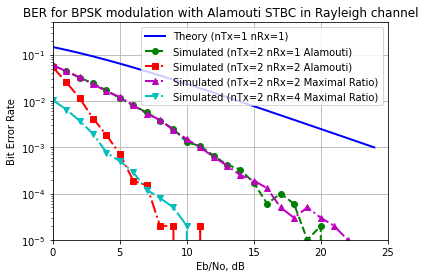

In [12]:
sim_ber_2Tx_1Rx = alamouti_2Tx_1Rx ()

sim_ber_2Tx_2Rx = alamouti_2Tx_2Rx ()

sim_ber_maximal_2Rx = maximal_ratio_combining_2Rx()

sim_ber_maximal_4Rx = maximal_ratio_combining_4Rx()

EbN0Lin = 10 ** (eb_no_db / 10)

# Calculate theoretical BER using the BPSK formula

theoryBer = 0.5 * (1 - np.sqrt(EbN0Lin / (EbN0Lin + 1)))

# Plot

plt.figure()

# Theory (nTx=1 nRx=1)

plt.semilogy(eb_no_db, theoryBer, 'b-', linewidth=2, label='Theory (nTx=1 nRx=1)')

# Simulated (nTx=2 nRx=1 Alamouti)

plt.semilogy(eb_no_db, sim_ber_2Tx_1Rx, 'g--o', linewidth=2, label='Simulated (nTx=2 nRx=1 Alamouti)')

# Simulated (nTx=2 nRx=2 Alamouti)

plt.semilogy(eb_no_db, sim_ber_2Tx_2Rx, 'r-.s', linewidth=2, label='Simulated (nTx=2 nRx=2 Alamouti)')

# Simulated (nTx=2 nRx=2 Maximal Ratio)

plt.semilogy(eb_no_db, sim_ber_maximal_2Rx, 'm-.^', linewidth=2, label='Simulated (nTx=2 nRx=2 Maximal Ratio)')

# Simulated (nTx=2 nRx=4 Maximal Ratio)

plt.semilogy(eb_no_db, sim_ber_maximal_4Rx, 'c-.v', linewidth=2, label='Simulated (nTx=2 nRx=4 Maximal Ratio)')

plt.axis([0, 25, 1e-5, 0.5])

plt.grid(True)

plt.legend()

plt.xlabel('Eb/No, dB')

plt.ylabel('Bit Error Rate')

plt.title('BER for BPSK modulation with Alamouti STBC in Rayleigh channel')

plt.show()
